1. Подсчитайте количество изображений в каждом классе.
2. Найдите минимальный, максимальный и средний размеры изображений.
3. Визуализируйте распределение размеров и гистограмму по классам.

Количество изображений в каждом классе:
Гароу: 30
Генос: 30
Сайтама: 30
Соник: 30
Татсумаки: 30
Фубуки: 30

Размеры изображений:
Минимальный размер: (210, 240)
Максимальный размер: (736, 1308)
Средний размер: (538.8944444444444, 623.5555555555555)


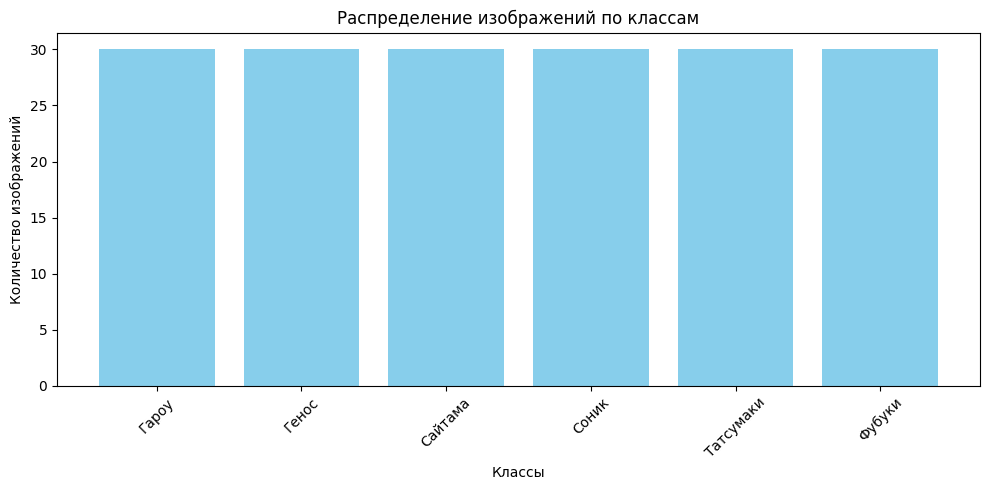

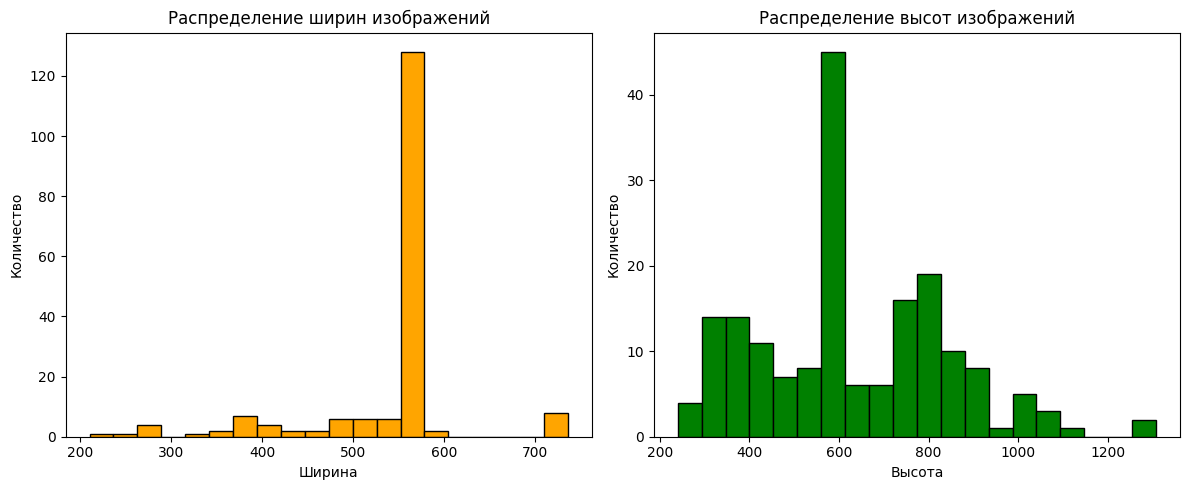

In [2]:
import os
from collections import Counter
from datasets import CustomImageDataset
from PIL import Image
import matplotlib.pyplot as plt

root = 'data/train'

dataset = CustomImageDataset(root, transform=None)

# Подсчёт количества изображений по классам
label_counts = Counter(dataset.labels)
class_names = dataset.get_class_names()

print("Количество изображений в каждом классе:")
for idx, count in label_counts.items():
    print(f"{class_names[idx]}: {count}")

# Анализ размеров изображений
widths = []
heights = []
areas = []

for img_path in dataset.images:
    with Image.open(img_path) as img:
        w, h = img.size
        widths.append(w)
        heights.append(h)
        areas.append(w * h)

# Статистика по размерам
min_size = (min(widths), min(heights))
max_size = (max(widths), max(heights))
avg_size = (sum(widths) / len(widths), sum(heights) / len(heights))

print("\nРазмеры изображений:")
print(f"Минимальный размер: {min_size}")
print(f"Максимальный размер: {max_size}")
print(f"Средний размер: {avg_size}")

# Визуализация
plt.figure(figsize=(10, 5))
plt.bar([class_names[i] for i in label_counts.keys()], label_counts.values(), color='skyblue')
plt.xlabel("Классы")
plt.ylabel("Количество изображений")
plt.title("Распределение изображений по классам")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Распределение ширины и высоты
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='orange', edgecolor='black')
plt.xlabel("Ширина")
plt.ylabel("Количество")
plt.title("Распределение ширин изображений")

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='green', edgecolor='black')
plt.xlabel("Высота")
plt.ylabel("Количество")
plt.title("Распределение высот изображений")

plt.tight_layout()
plt.show()
